# Job Postings Dataset - Exploratory Data Analysis

This notebook provides a comprehensive exploratory data analysis of the job postings dataset. We will examine the structure of the data, identify patterns, and visualize key insights.

In [2]:
# Install necessary libraries
%pip install pandas numpy matplotlib seaborn plotly wordcloud scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Data Loading and Initial Exploration

In [4]:
# Load the dataset
df = pd.read_csv('../data/postings.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total number of job postings: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (123849, 31)
Total number of job postings: 123,849
Number of features: 31


In [5]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,min_salary,formatted_work_type,applies,original_listed_time,remote_allowed,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,17.0,Full-time,2.0,1.713398e+12,NaN,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,ComplexOnsiteApply,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,30.0,Full-time,NaN,1.712858e+12,NaN,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,ComplexOnsiteApply,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,45000.0,Full-time,NaN,1.713278e+12,NaN,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,ComplexOnsiteApply,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,140000.0,Full-time,NaN,1.712896e+12,NaN,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,ComplexOnsiteApply,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,60000.0,Full-time,NaN,1.713452e+12,NaN,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,ComplexOnsiteApply,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [6]:
# Basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  

In [7]:
# Column names and data types
print("Column names and data types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

Column names and data types:
job_id: int64
company_name: object
title: object
description: object
max_salary: float64
pay_period: object
location: object
company_id: float64
views: float64
med_salary: float64
min_salary: float64
formatted_work_type: object
applies: float64
original_listed_time: float64
remote_allowed: float64
job_posting_url: object
application_url: object
application_type: object
expiry: float64
closed_time: float64
formatted_experience_level: object
skills_desc: object
listed_time: float64
posting_domain: object
sponsored: int64
work_type: object
currency: object
compensation_type: object
normalized_salary: float64
zip_code: float64
fips: float64


## 2. Data Quality Assessment

In [8]:
# Check for missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})

print("Missing Values Analysis:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
                            Missing Count  Missing Percentage
closed_time                        122776           99.133622
skills_desc                        121410           98.030666
med_salary                         117569           94.929309
remote_allowed                     108603           87.689848
applies                            100529           81.170619
min_salary                          94056           75.944093
max_salary                          94056           75.944093
currency                            87776           70.873402
compensation_type                   87776           70.873402
pay_period                          87776           70.873402
normalized_salary                   87776           70.873402
posting_domain                      39968           32.271556
application_url                     36665           29.604599
formatted_experience_level          29409           23.745852
fips                                27415    

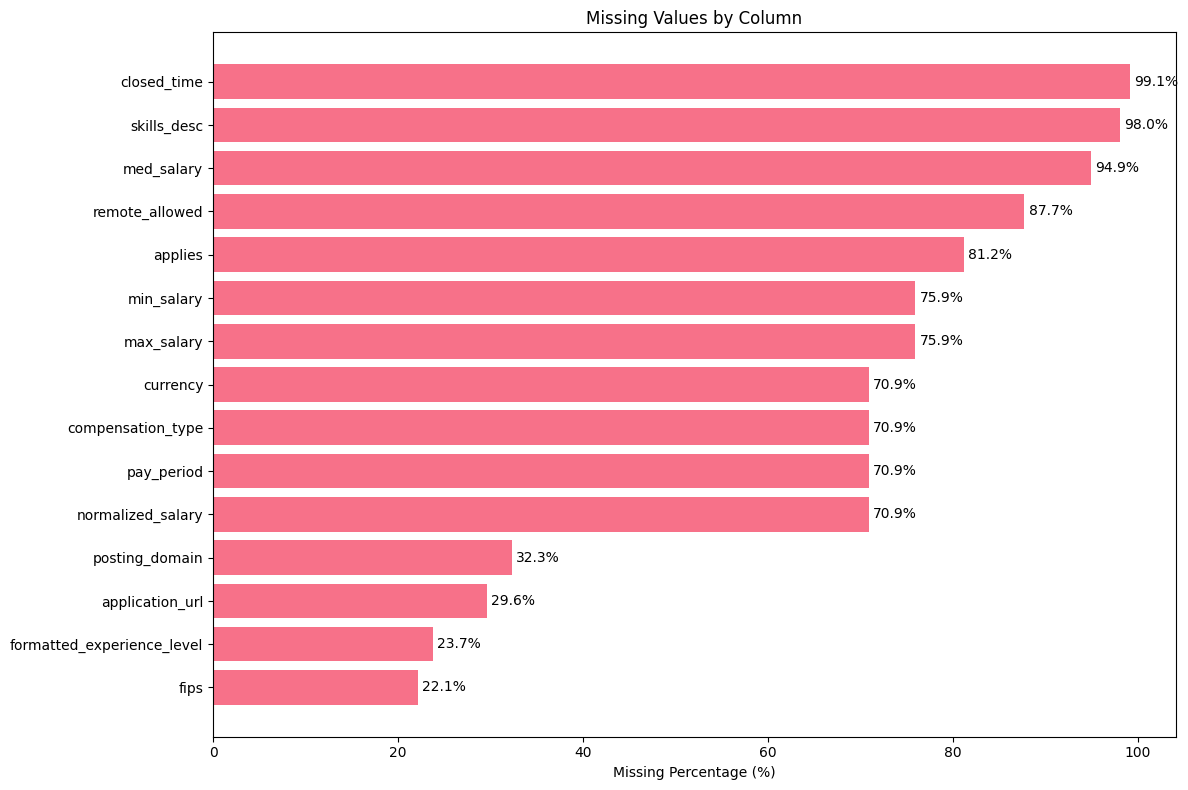

In [9]:
# Visualize missing values
plt.figure(figsize=(12, 8))
missing_cols = missing_df[missing_df['Missing Count'] > 0].head(15)

if not missing_cols.empty:
    plt.barh(range(len(missing_cols)), missing_cols['Missing Percentage'])
    plt.yticks(range(len(missing_cols)), missing_cols.index)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.gca().invert_yaxis()
    
    for i, v in enumerate(missing_cols['Missing Percentage']):
        plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
else:
    plt.text(0.5, 0.5, 'No Missing Values Found!', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=16)

plt.tight_layout()
plt.show()

In [10]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count:,}")
print(f"Percentage of duplicates: {duplicate_count/len(df)*100:.2f}%")

Number of duplicate rows: 0
Percentage of duplicates: 0.00%


## 3. Descriptive Statistics

In [11]:
# Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print("Descriptive Statistics for Numerical Columns:")
    df[numerical_cols].describe()
else:
    print("No numerical columns found in the dataset.")

Descriptive Statistics for Numerical Columns:


In [29]:
# Analysis for Superlinked NumberSpace Configuration
print("=" * 60)
print("ANALYSIS FOR SUPERLINKED NUMBERSPACES")
print("=" * 60)

# Define columns of interest for Superlinked configuration
target_columns = ['normalized_salary', 'salary', 'views', 'applies']
available_columns = [col for col in target_columns if col in df.columns]

print(f"Looking for columns: {target_columns}")
print(f"Available columns: {available_columns}")
print()

if available_columns:
    for col in available_columns:
        print(f"Analysis for '{col}':")
        print("-" * 40)
        
        # Basic statistics
        col_data = df[col].dropna()
        
        if len(col_data) > 0:
            print(f"   Non-null entries: {len(col_data):,}")
            print(f"   Min value: {col_data.min():,.2f}")
            print(f"   Max value: {col_data.max():,.2f}")
            print(f"   Mean value: {col_data.mean():,.2f}")
            print(f"   Median value: {col_data.median():,.2f}")
            print(f"   75th percentile: {col_data.quantile(0.75):,.2f}")
            print(f"   90th percentile: {col_data.quantile(0.90):,.2f}")
            print(f"   95th percentile: {col_data.quantile(0.95):,.2f}")
            print(f"   99th percentile: {col_data.quantile(0.99):,.2f}")
            
            # Check for outliers using IQR method
            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
            
            print(f"   Outliers (IQR method): {len(outliers):,} ({len(outliers)/len(col_data)*100:.2f}%)")
            print(f"   Recommended max_value: {col_data.quantile(0.99):,.0f}")
            
            print()
        else:
            print(f"   No non-null values found for '{col}'")
            print()
else:
    print("None of the target columns found in the dataset.")
    print("Available numerical columns:")
    for col in numerical_cols:
        print(f"   - {col}")

print("=" * 60)

ANALYSIS FOR SUPERLINKED NUMBERSPACES
Looking for columns: ['normalized_salary', 'salary', 'views', 'applies']
Available columns: ['normalized_salary', 'views', 'applies']

Analysis for 'normalized_salary':
----------------------------------------
   Non-null entries: 36,073
   Min value: 0.00
   Max value: 535,600,000.00
   Mean value: 205,327.04
   Median value: 81,500.00
   75th percentile: 125,000.00
   90th percentile: 168,000.00
   95th percentile: 200,000.00
   99th percentile: 300,808.00
   Outliers (IQR method): 952 (2.64%)
   Recommended max_value: 300,808

Analysis for 'views':
----------------------------------------
   Non-null entries: 122,160
   Min value: 1.00
   Max value: 9,975.00
   Mean value: 14.62
   Median value: 4.00
   75th percentile: 8.00
   90th percentile: 23.00
   95th percentile: 48.00
   99th percentile: 177.00
   Outliers (IQR method): 16,902 (13.84%)
   Recommended max_value: 177

Analysis for 'applies':
----------------------------------------
   Non-

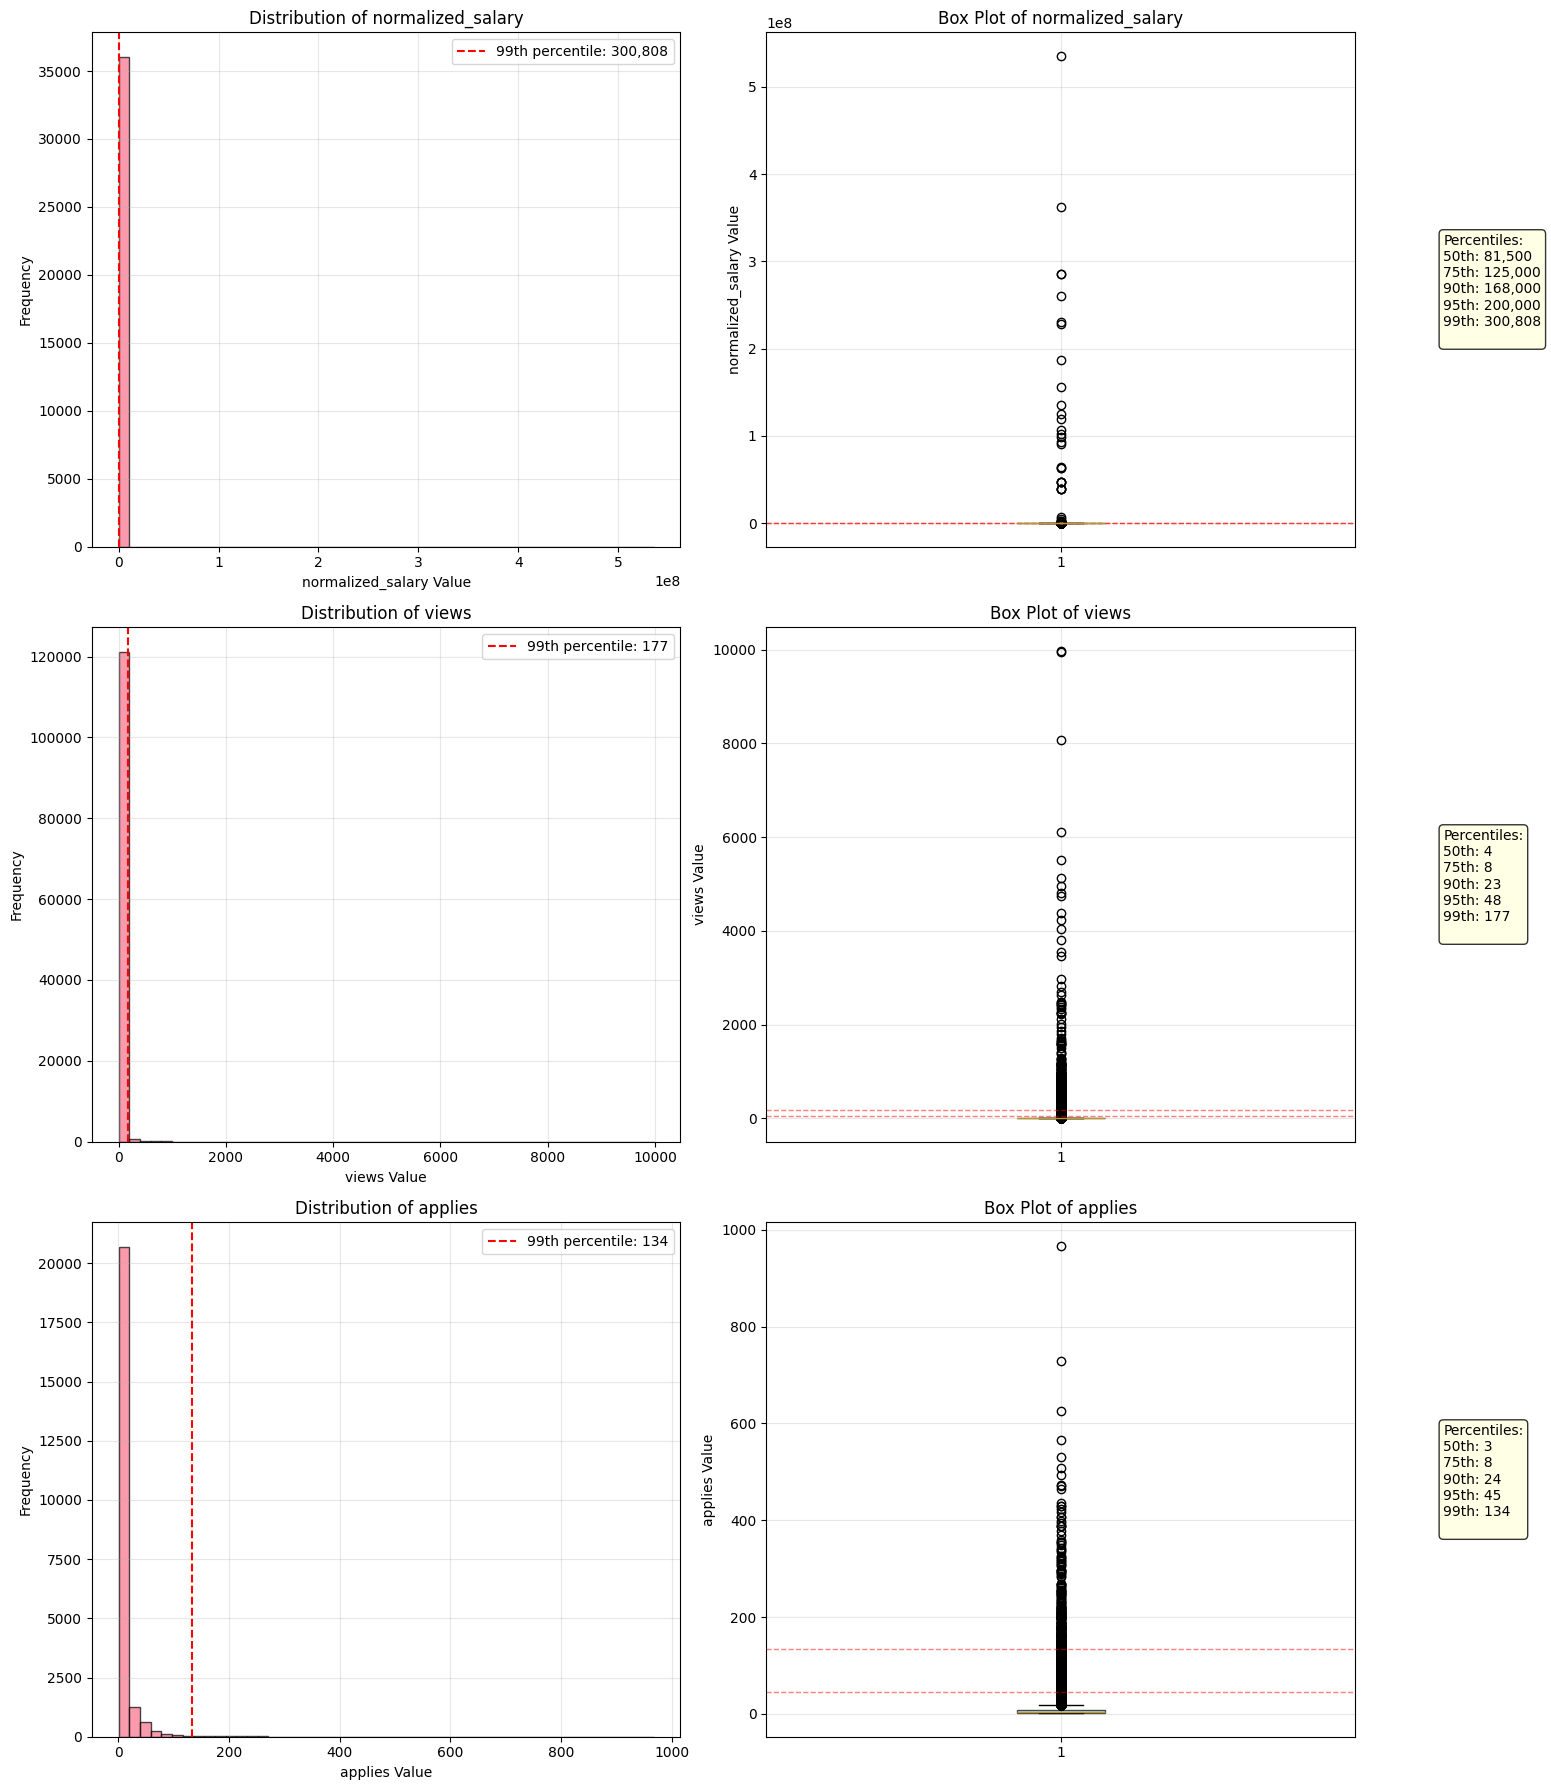


SUPERLINKED CONFIGURATION RECOMMENDATIONS

normalized_salary_space = sl.NumberSpace(
    job_schema.normalized_salary,
    min_value=0,
    max_value=300,808,  # 99th percentile of your data
    mode=sl.Mode.MAXIMUM,
    scale=sl.LogarithmicScale(),
)

views_space = sl.NumberSpace(
    job_schema.views,
    min_value=0,
    max_value=177,  # 99th percentile of your data
    mode=sl.Mode.MAXIMUM,
    scale=sl.LogarithmicScale(),
)

applies_space = sl.NumberSpace(
    job_schema.applies,
    min_value=0,
    max_value=134,  # 99th percentile of your data
    mode=sl.Mode.MAXIMUM,
    scale=sl.LogarithmicScale(),
)

SUMMARY TABLE:
Column               Recommended Max Percentile   Actual Max     
----------------------------------------------------------------------
normalized_salary    300,808         99th         535,600,000    
views                177             99th         9,975          
applies              134             99th         967            



In [28]:
# Visualize distributions for Superlinked NumberSpace columns
if available_columns:
    fig, axes = plt.subplots(len(available_columns), 2, figsize=(16, 6*len(available_columns)))
    
    # Handle single column case
    if len(available_columns) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(available_columns):
        col_data = df[col].dropna()
        
        if len(col_data) > 0:
            # Histogram
            axes[idx, 0].hist(col_data, bins=50, alpha=0.7, edgecolor='black')
            axes[idx, 0].set_xlabel(f'{col} Value')
            axes[idx, 0].set_ylabel('Frequency')
            axes[idx, 0].set_title(f'Distribution of {col}')
            axes[idx, 0].axvline(col_data.quantile(0.99), color='red', linestyle='--', 
                               label=f'99th percentile: {col_data.quantile(0.99):,.0f}')
            axes[idx, 0].legend()
            axes[idx, 0].grid(True, alpha=0.3)
            
            # Box plot with improved layout
            bp = axes[idx, 1].boxplot(col_data, vert=True, patch_artist=True,
                                    boxprops=dict(facecolor='lightblue', alpha=0.7))
            axes[idx, 1].set_ylabel(f'{col} Value')
            axes[idx, 1].set_title(f'Box Plot of {col}')
            axes[idx, 1].grid(True, alpha=0.3)
            
            # Add percentile annotations with improved positioning
            percentiles = [50, 75, 90, 95, 99]
            y_range = col_data.max() - col_data.min()
            
            # Create a table-like annotation on the right side
            annotation_text = "Percentiles:\n"
            for p in percentiles:
                val = col_data.quantile(p/100)
                annotation_text += f"{p}th: {val:,.0f}\n"
            
            # Position the text box to the right of the plot
            axes[idx, 1].text(1.15, 0.5, annotation_text, 
                            transform=axes[idx, 1].transAxes,
                            verticalalignment='center',
                            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8),
                            fontsize=10)
            
            # Add horizontal lines for key percentiles only
            for p in [95, 99]:
                val = col_data.quantile(p/100)
                axes[idx, 1].axhline(val, color='red', linestyle='--', alpha=0.5, linewidth=1)
    
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # Make room for annotations
    plt.show()
    
    # Enhanced summary recommendations for Superlinked configuration
    print("\n" + "=" * 70)
    print("SUPERLINKED CONFIGURATION RECOMMENDATIONS")
    print("=" * 70)
    
    recommendation_table = []
    
    for col in available_columns:
        col_data = df[col].dropna()
        if len(col_data) > 0:
            # Use 99th percentile as recommended max to handle outliers better
            p95 = col_data.quantile(0.95)
            p99 = col_data.quantile(0.99)
            max_val = col_data.max()
            
            # Choose appropriate max value
            if p99 < max_val * 0.8:  # If 99th percentile is much lower than max
                recommended_max = p99
                percentile_used = "99th"
            else:
                recommended_max = p95
                percentile_used = "95th"
            
            print(f"\n{col}_space = sl.NumberSpace(")
            print(f"    job_schema.{col},")
            print(f"    min_value=0,")
            print(f"    max_value={recommended_max:,.0f},  # {percentile_used} percentile of your data")
            print(f"    mode=sl.Mode.MAXIMUM,")
            print(f"    scale=sl.LogarithmicScale(),")
            print(f")")
            
            # Store for summary table
            recommendation_table.append({
                'Column': col,
                'Min': 0,
                'Max (recommended)': f"{recommended_max:,.0f}",
                'Percentile Used': percentile_used,
                'Data Max': f"{max_val:,.0f}"
            })
    
    # Create summary table
    if recommendation_table:
        print(f"\n{'='*70}")
        print("SUMMARY TABLE:")
        print(f"{'='*70}")
        print(f"{'Column':<20} {'Recommended Max':<15} {'Percentile':<12} {'Actual Max':<15}")
        print("-" * 70)
        for item in recommendation_table:
            print(f"{item['Column']:<20} {item['Max (recommended)']:<15} {item['Percentile Used']:<12} {item['Data Max']:<15}")
    
    print("\n" + "=" * 70)

In [21]:
# Descriptive statistics for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Number of categorical columns: {len(categorical_cols)}")
print("\nCategorical columns:")

# Dictionary to store categories with few unique values
low_cardinality_categories = {}
threshold = 20  # Adjust this threshold as needed

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count:,} unique values")
    
    # If column has few unique values, store them
    if unique_count <= threshold:
        unique_values = df[col].dropna().unique().tolist()
        low_cardinality_categories[col] = {
            "unique_count": unique_count,
            "values": unique_values
        }

# Get project root directory path (one level up from notebook folder)
project_root = os.path.dirname(os.getcwd())
data_dir = os.path.join(project_root, 'data')

# Create data directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Save to JSON file
output_file = os.path.join(data_dir, 'low_cardinality_categories.json')
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(low_cardinality_categories, f, indent=2, ensure_ascii=False)

print(f"\nLow cardinality categories saved to: {output_file}")
print(f"Columns with <= {threshold} unique values: {len(low_cardinality_categories)}")

Number of categorical columns: 15

Categorical columns:
company_name: 24,428 unique values
title: 72,521 unique values
description: 107,827 unique values
pay_period: 5 unique values
location: 8,526 unique values
formatted_work_type: 7 unique values
job_posting_url: 123,849 unique values
application_url: 84,800 unique values
application_type: 4 unique values
formatted_experience_level: 6 unique values
skills_desc: 2,212 unique values
posting_domain: 4,443 unique values
work_type: 7 unique values
currency: 6 unique values
compensation_type: 1 unique values

Low cardinality categories saved to: /home/gururaser/projects/hobby/RoleRadar/data/low_cardinality_categories.json
Columns with <= 20 unique values: 7


## 4. Key Insights and Patterns

In [13]:
# Let's examine some key columns that are likely to be in job postings data
# This will be adjusted based on actual column names

print("Sample of column names:")
print(list(df.columns)[:20])  # Show first 20 column names

Sample of column names:
['job_id', 'company_name', 'title', 'description', 'max_salary', 'pay_period', 'location', 'company_id', 'views', 'med_salary', 'min_salary', 'formatted_work_type', 'applies', 'original_listed_time', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time']


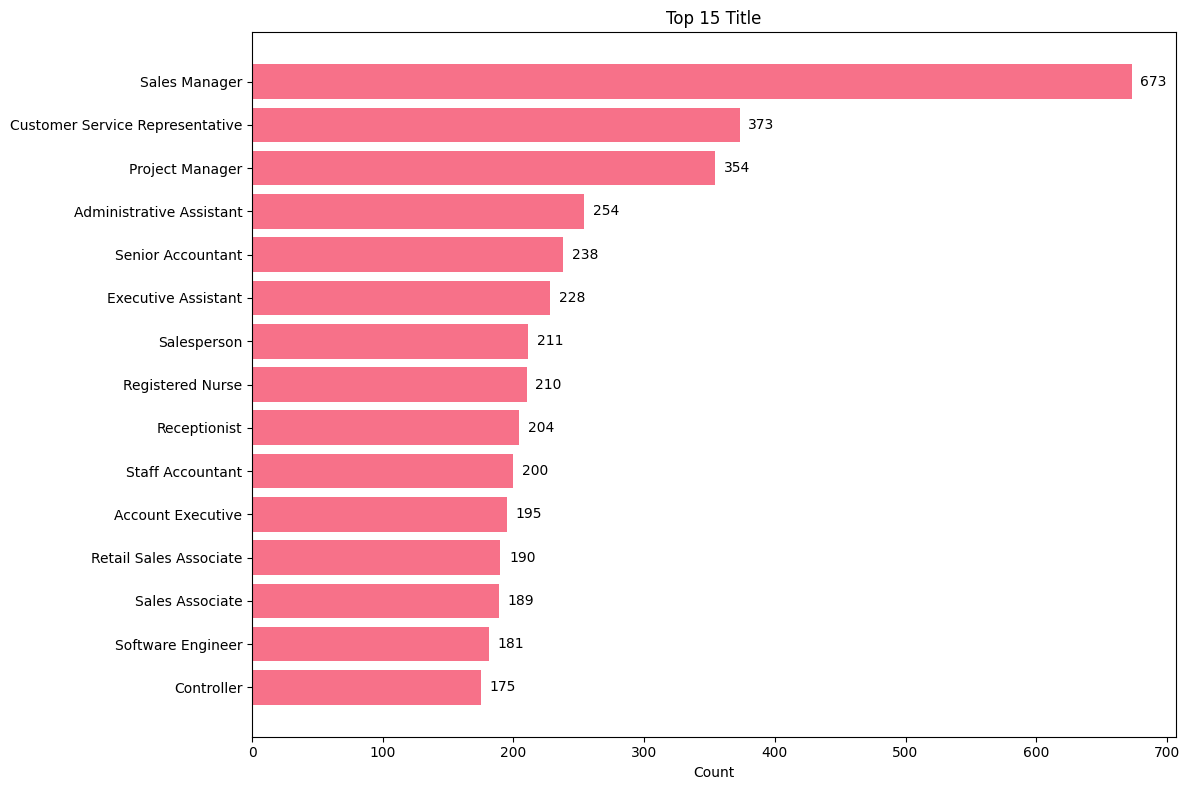


Top 15 title:
 1. Sales Manager: 673 (0.54%)
 2. Customer Service Representative: 373 (0.30%)
 3. Project Manager: 354 (0.29%)
 4. Administrative Assistant: 254 (0.21%)
 5. Senior Accountant: 238 (0.19%)
 6. Executive Assistant: 228 (0.18%)
 7. Salesperson: 211 (0.17%)
 8. Registered Nurse: 210 (0.17%)
 9. Receptionist: 204 (0.16%)
10. Staff Accountant: 200 (0.16%)
11. Account Executive: 195 (0.16%)
12. Retail Sales Associate: 190 (0.15%)
13. Sales Associate: 189 (0.15%)
14. Software Engineer: 181 (0.15%)
15. Controller: 175 (0.14%)


In [14]:
# Function to create value counts visualization
def plot_top_categories(column_name, top_n=15, figsize=(12, 8)):
    """
    Plot top N categories for a given column
    """
    if column_name in df.columns:
        top_values = df[column_name].value_counts().head(top_n)
        
        plt.figure(figsize=figsize)
        plt.barh(range(len(top_values)), top_values.values)
        plt.yticks(range(len(top_values)), top_values.index)
        plt.xlabel('Count')
        plt.title(f'Top {top_n} {column_name.title().replace("_", " ")}')
        plt.gca().invert_yaxis()
        
        # Add value labels
        for i, v in enumerate(top_values.values):
            plt.text(v + max(top_values.values) * 0.01, i, f'{v:,}', va='center')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop {top_n} {column_name}:")
        for i, (category, count) in enumerate(top_values.items(), 1):
            percentage = (count / len(df)) * 100
            print(f"{i:2d}. {category}: {count:,} ({percentage:.2f}%)")
    else:
        print(f"Column '{column_name}' not found in dataset.")

# Try to analyze common job posting columns
common_columns = ['title', 'job_title', 'company', 'company_name', 'location', 
                 'industry', 'department', 'employment_type', 'experience_level']

for col in common_columns:
    if col in df.columns:
        plot_top_categories(col)
        break

## 5. Text Analysis (if applicable)


Text Analysis for 'description':
Non-null entries: 123,842
Average text length: 3766.46 characters
Median text length: 3435.00 characters
Min text length: 2 characters
Max text length: 23201 characters


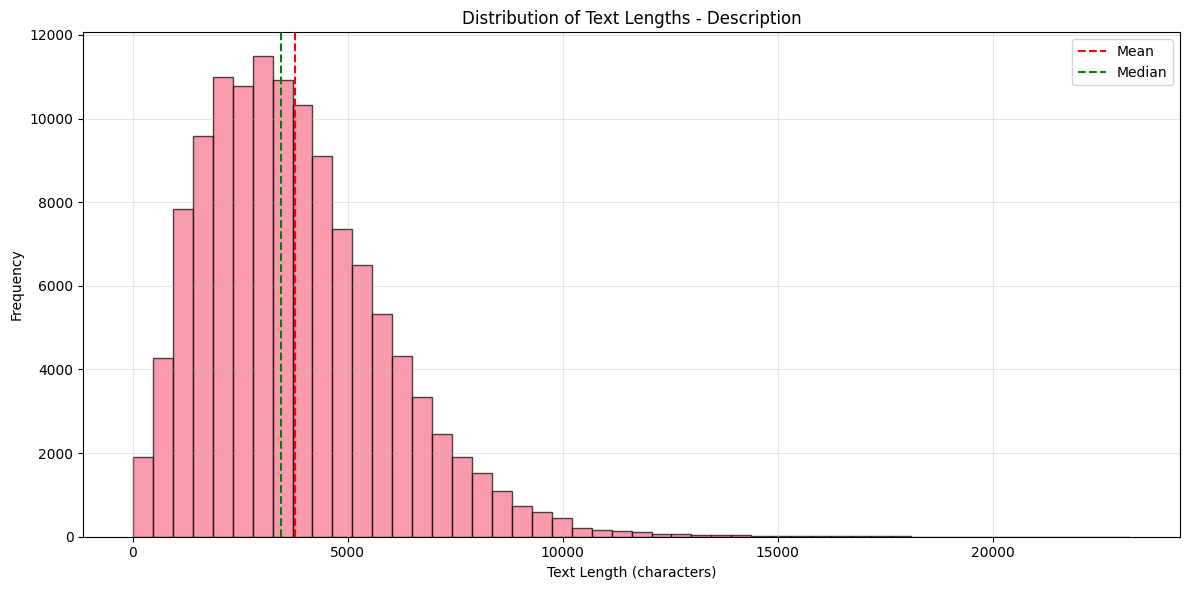

In [15]:
# Function to analyze text columns
def analyze_text_column(column_name):
    """
    Analyze text column for length distribution and common words
    """
    if column_name in df.columns:
        # Remove null values
        text_data = df[column_name].dropna()
        
        if len(text_data) > 0:
            # Calculate text lengths
            text_lengths = text_data.astype(str).str.len()
            
            print(f"\nText Analysis for '{column_name}':")
            print(f"Non-null entries: {len(text_data):,}")
            print(f"Average text length: {text_lengths.mean():.2f} characters")
            print(f"Median text length: {text_lengths.median():.2f} characters")
            print(f"Min text length: {text_lengths.min()} characters")
            print(f"Max text length: {text_lengths.max()} characters")
            
            # Plot text length distribution
            plt.figure(figsize=(12, 6))
            plt.hist(text_lengths, bins=50, alpha=0.7, edgecolor='black')
            plt.xlabel('Text Length (characters)')
            plt.ylabel('Frequency')
            plt.title(f'Distribution of Text Lengths - {column_name.title()}')
            plt.axvline(text_lengths.mean(), color='red', linestyle='--', label='Mean')
            plt.axvline(text_lengths.median(), color='green', linestyle='--', label='Median')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

# Look for text columns (description, requirements, etc.)
text_columns = ['description', 'job_description', 'requirements', 'skills', 
               'responsibilities', 'summary', 'details']

for col in text_columns:
    if col in df.columns:
        analyze_text_column(col)
        break

## 6. Data Visualization Dashboard

In [16]:
# Create an interactive dashboard with plotly
def create_overview_dashboard():
    """
    Create an overview dashboard of the dataset
    """
    # Basic dataset statistics
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Dataset Overview', 'Missing Values', 'Data Types', 'Column Analysis'),
        specs=[[{"type": "indicator"}, {"type": "bar"}],
               [{"type": "pie"}, {"type": "bar"}]]
    )
    
    # Dataset overview
    fig.add_trace(
        go.Indicator(
            mode = "number",
            value = len(df),
            title = {"text": "Total Records"},
        ),
        row=1, col=1
    )
    
    # Missing values
    if missing_data.sum() > 0:
        top_missing = missing_data[missing_data > 0].head(10)
        fig.add_trace(
            go.Bar(
                x=top_missing.values,
                y=top_missing.index,
                orientation='h',
                name='Missing Values'
            ),
            row=1, col=2
        )
    
    # Data types distribution
    dtype_counts = df.dtypes.value_counts()
    fig.add_trace(
        go.Pie(
            labels=dtype_counts.index.astype(str),
            values=dtype_counts.values,
            name="Data Types"
        ),
        row=2, col=1
    )
    
    fig.update_layout(
        title_text="Job Postings Dataset Overview",
        showlegend=False,
        height=800
    )
    
    fig.show()

create_overview_dashboard()

## 7. Correlation Analysis

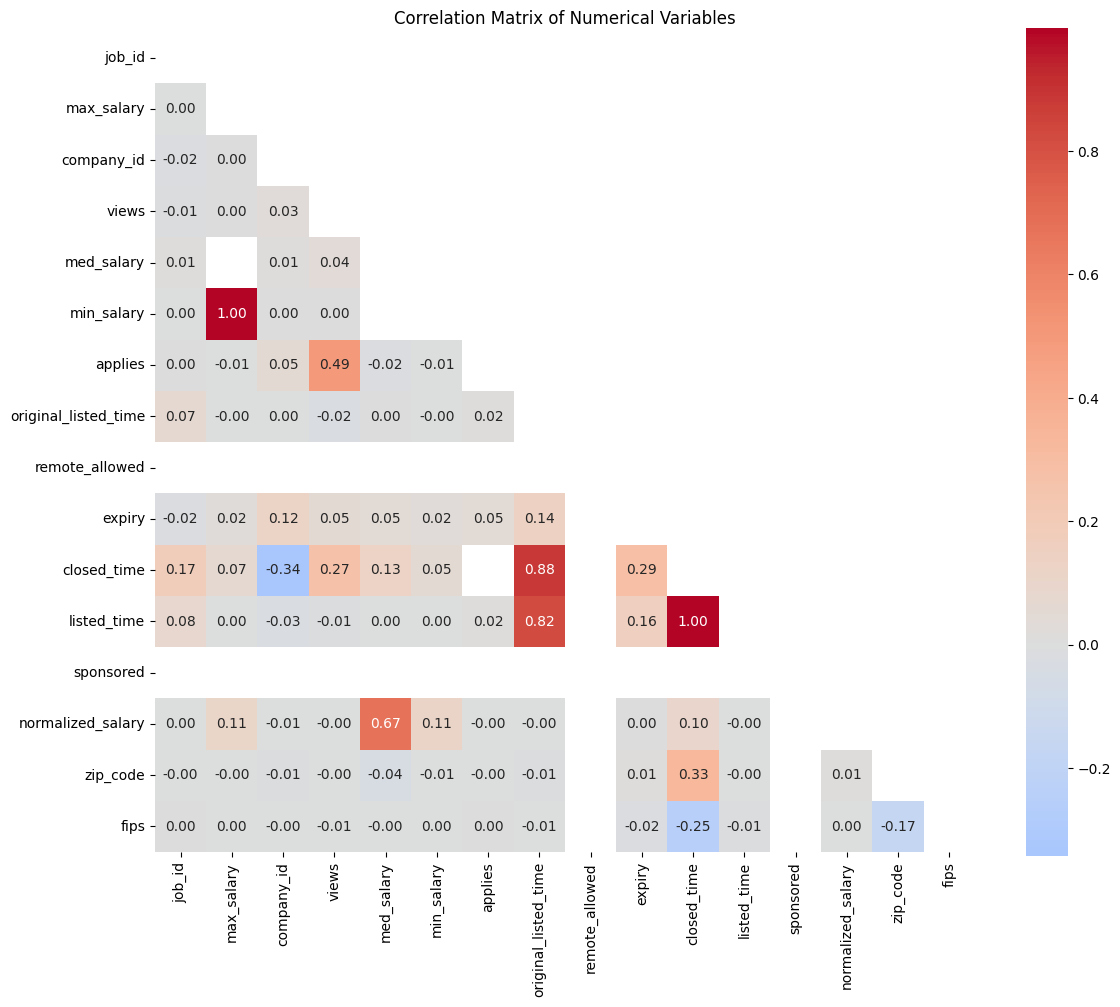


Highly Correlated Variable Pairs (|correlation| > 0.7):
max_salary - min_salary: 0.998
original_listed_time - closed_time: 0.880
original_listed_time - listed_time: 0.820
closed_time - listed_time: 1.000


In [17]:
# Correlation analysis for numerical columns
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:  # High correlation threshold
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))
    
    if high_corr_pairs:
        print("\nHighly Correlated Variable Pairs (|correlation| > 0.7):")
        for var1, var2, corr in high_corr_pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
else:
    print("Not enough numerical columns for correlation analysis.")

## 8. Advanced Analysis

In [18]:
# Sample a subset of data for detailed analysis (if dataset is very large)
if len(df) > 100000:
    sample_size = min(50000, len(df))
    df_sample = df.sample(n=sample_size, random_state=42)
    print(f"Using a sample of {sample_size:,} records for detailed analysis.")
else:
    df_sample = df.copy()
    print(f"Using full dataset with {len(df):,} records for analysis.")

Using a sample of 50,000 records for detailed analysis.


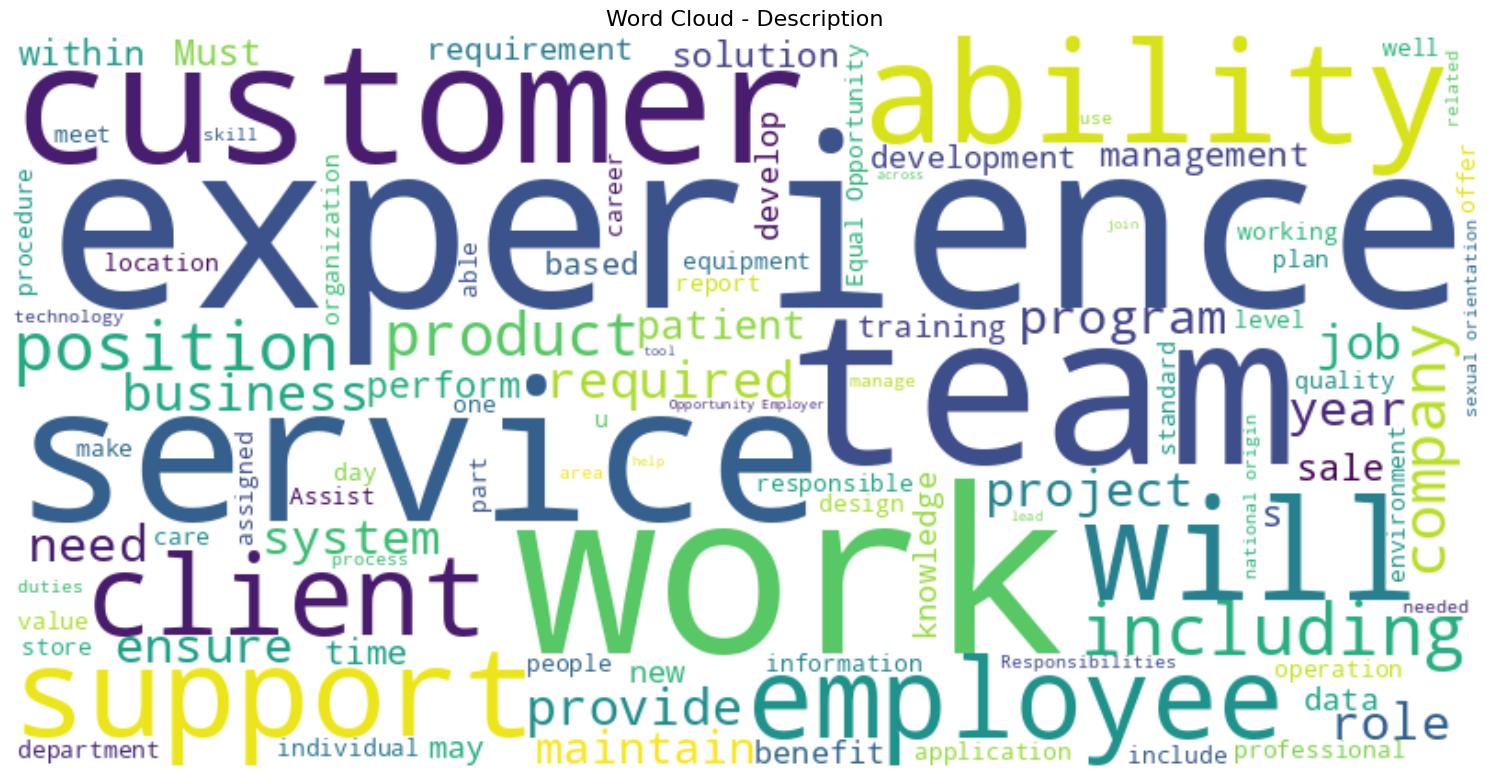

In [19]:
# Create word cloud for text data (if available)
def create_wordcloud(column_name, max_words=100):
    """
    Create word cloud for text column
    """
    if column_name in df_sample.columns:
        text_data = df_sample[column_name].dropna().astype(str)
        
        if len(text_data) > 0:
            # Combine all text
            all_text = ' '.join(text_data.head(1000))  # Use first 1000 entries
            
            # Create word cloud
            wordcloud = WordCloud(
                width=800, 
                height=400, 
                background_color='white',
                max_words=max_words,
                colormap='viridis'
            ).generate(all_text)
            
            plt.figure(figsize=(15, 8))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud - {column_name.title().replace("_", " ")}', fontsize=16)
            plt.tight_layout()
            plt.show()

# Try to create word clouds for text columns
for col in text_columns:
    if col in df_sample.columns:
        create_wordcloud(col)
        break

## 9. Summary and Key Findings

In [20]:
# Generate comprehensive summary
print("=" * 60)
print("JOB POSTINGS DATASET - EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Total Features: {len(df.columns)}")
print(f"   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🔍 DATA QUALITY:")
print(f"   • Missing Values: {df.isnull().sum().sum():,} ({df.isnull().sum().sum()/df.size*100:.2f}% of all values)")
print(f"   • Duplicate Rows: {duplicate_count:,} ({duplicate_count/len(df)*100:.2f}%)")
print(f"   • Complete Rows: {len(df.dropna()):,} ({len(df.dropna())/len(df)*100:.2f}%)")

print(f"\n📈 DATA TYPES:")
dtype_summary = df.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"   • {dtype}: {count} columns")

if len(numerical_cols) > 0:
    print(f"\n🔢 NUMERICAL FEATURES:")
    for col in numerical_cols[:5]:  # Show first 5 numerical columns
        mean_val = df[col].mean()
        std_val = df[col].std()
        print(f"   • {col}: Mean = {mean_val:.2f}, Std = {std_val:.2f}")

print(f"\n📝 CATEGORICAL FEATURES:")
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    unique_count = df[col].nunique()
    most_common = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'
    print(f"   • {col}: {unique_count:,} unique values, Most common: '{most_common}'")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • Dataset contains information about {len(df):,} job postings")
print(f"   • {len(categorical_cols)} categorical and {len(numerical_cols)} numerical features")
if missing_data.sum() > 0:
    print(f"   • Data cleaning may be needed for {(missing_data > 0).sum()} columns with missing values")
else:
    print(f"   • No missing values detected - clean dataset!")

print(f"\n📋 RECOMMENDATIONS:")
print(f"   • Consider feature engineering for text columns")
print(f"   • Explore relationships between job attributes")
print(f"   • Apply NLP techniques for text analysis")
print(f"   • Consider clustering analysis for job categorization")

print("\n" + "=" * 60)

JOB POSTINGS DATASET - EXPLORATORY DATA ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Total Records: 123,849
   • Total Features: 31
   • Memory Usage: 928.20 MB

🔍 DATA QUALITY:
   • Missing Values: 1,269,564 (33.07% of all values)
   • Duplicate Rows: 0 (0.00%)
   • Complete Rows: 0 (0.00%)

📈 DATA TYPES:
   • object: 15 columns
   • float64: 14 columns
   • int64: 2 columns

🔢 NUMERICAL FEATURES:
   • job_id: Mean = 3896402138.07, Std = 84043545.16
   • max_salary: Mean = 91939.42, Std = 701110.14
   • company_id: Mean = 12204012.34, Std = 25541431.66
   • views: Mean = 14.62, Std = 85.90
   • med_salary: Mean = 22015.62, Std = 52255.87

📝 CATEGORICAL FEATURES:
   • company_name: 24,428 unique values, Most common: 'Liberty Healthcare and Rehabilitation Services'
   • title: 72,521 unique values, Most common: 'Sales Manager'
   • description: 107,827 unique values, Most common: 'Position Summary: Our Sales Manager has managing partnerresponsibilities for a team of 5-25 Executive Consult